<a href="https://colab.research.google.com/github/AdonaiVera/cincipy_malaria/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO DE CURSO OPCIONAL: Malaria


In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/MalariaCells.zip \
    -O /tmp/MalariaCells.zip

--2021-10-08 22:15:18--  https://storage.googleapis.com/platzi-tf2/MalariaCells.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.188.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 547750600 (522M) [application/zip]
Saving to: ‘/tmp/MalariaCells.zip’

/tmp/MalariaCells.z 100%[===================>] 522.38M  41.4MB/s    in 13s     

2021-10-08 22:15:32 (41.6 MB/s) - ‘/tmp/MalariaCells.zip’ saved [547750600/547750600]



## Descomprimir la base de datos y almacenarla en carpetas training y test
El siguiente código de Python usará la biblioteca del sistema operativo para usar las bibliotecas del sistema operativo, lo que le dará acceso al sistema de archivos y la biblioteca zipfile le permitirá descomprimir los datos.

En el siguiente código de Python utilizamos la libreria OS para poder dar acceso a los archivos del sistema operativo y luego con la libería ZipFile descomprimimos la base de datos.

In [ ]:
import os
import zipfile

local_zip = "/tmp/MalariaCells.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/MalariaCells")
zip_ref.close()

#### Cargamos librerías

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Buscamos la dirección de nuestra base de datos
En este caso la base de datos esta distruibuida en training y test. Cada carpeta contiene otra subcarpeta en donde se tiene cada una de las clases de la base de datos. 

In [ ]:
train_dir = "/tmp/MalariaCells/Train"
test_dir = "/tmp/MalariaCells/Test"

## Data Generators
Configuremos generadores de datos que leerán imágenes en nuestras carpetas de origen, las convertirán en tensores `float32` y las alimentarán (con sus etiquetas) a nuestra red. Tendremos un generador para las imágenes de entrenamiento y otro para las imágenes de validación. Nuestros generadores producirán lotes de imágenes de tamaño 28x28 y sus etiquetas.

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255, validation_split= 0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (124, 124),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "training"
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (124, 124),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (124, 124),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale"
)

Found 27558 images belonging to 2 classes.
Found 3166 images belonging to 2 classes.
Found 15832 images belonging to 2 classes.


#### Definimos las clases de nuestra base de datos

In [ ]:
classes = ["Parasitized", "Uninfected"]

## Visualizamos la data

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (10, 10))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:,:,0])
    ax.axis("off")
  plt.tight_layout()
  plt.show()

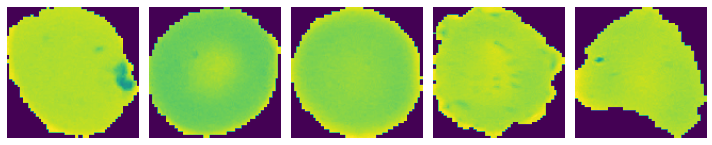

In [ ]:
sample_training_images, _= next(train_generator)
plotImages(sample_training_images[:5])

## Creamos nuestro modelo funcional base

In [ ]:
model_base = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (124, 124, 1)),
              tf.keras.layers.Dense(256, activation = "relu"),
              tf.keras.layers.Dense(128, activation = "relu"),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

In [ ]:
model_base.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 15376)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               3936512   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 3,969,666
Trainable params: 3,969,666
Non-trainable params: 0
_________________________________________________________________


## Entrenamiento
Entrenemos durante 10 épocas. Esto puede tardar unos minutos en ejecutarse.

In [ ]:
model_base.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ['accuracy'])


history = model_base.fit(
    train_generator, 
    epochs= 20, 
    validation_data = validation_generator
)

Epoch 1/20
216/216 [==============================] - 37s 156ms/step - loss: 0.8632 - accuracy: 0.5466 - val_loss: 0.6793 - val_accuracy: 0.5676
Epoch 2/20
216/216 [==============================] - 33s 153ms/step - loss: 0.6899 - accuracy: 0.5718 - val_loss: 0.6807 - val_accuracy: 0.5717
Epoch 3/20
216/216 [==============================] - 33s 153ms/step - loss: 0.6599 - accuracy: 0.6025 - val_loss: 0.6495 - val_accuracy: 0.6320
Epoch 4/20
216/216 [==============================] - 33s 152ms/step - loss: 0.6548 - accuracy: 0.6114 - val_loss: 0.6486 - val_accuracy: 0.6162
Epoch 5/20
216/216 [==============================] - 33s 152ms/step - loss: 0.6513 - accuracy: 0.6140 - val_loss: 0.6540 - val_accuracy: 0.6112
Epoch 6/20
216/216 [==============================] - 33s 151ms/step - loss: 0.6522 - accuracy: 0.6142 - val_loss: 0.6671 - val_accuracy: 0.5941
Epoch 7/20
216/216 [==============================] - 33s 153ms/step - loss: 0.6410 - accuracy: 0.6298 - val_loss: 0.6362 - val_ac

## Testeamos el modelo

In [ ]:
results = model_base.evaluate(test_generator)

124/124 [==============================] - 17s 140ms/step - loss: 0.5861 - accuracy: 0.6792


## Generamos una clase para visualizar y analizar los resultados

In [ ]:
def visualizacion_resultados(history):
  epochs = [i for i in range(20)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion accuracy")
  ax[0].set_title("Entrenamiento & validación accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  plt.show()


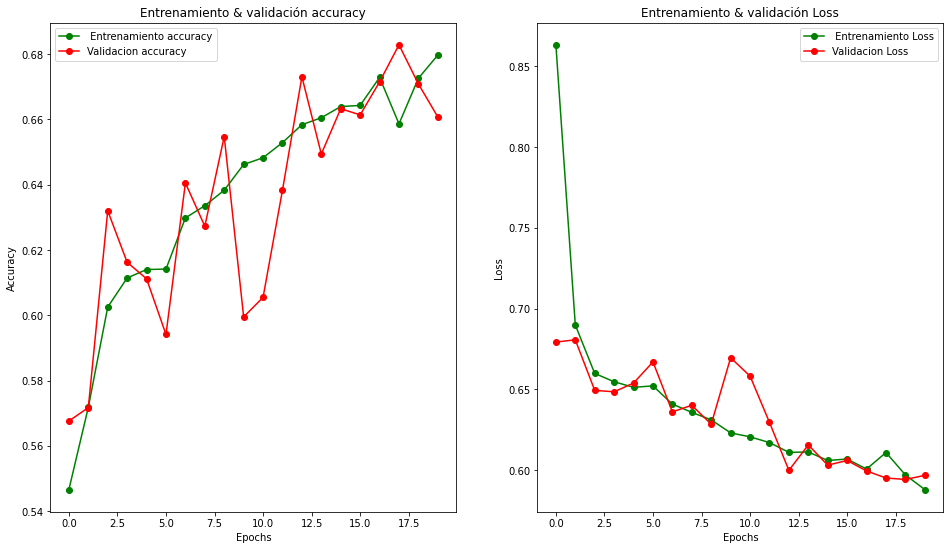

In [ ]:
visualizacion_resultados(history)

## Creamos nuestro modelo con regularizadores

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
model_optimizer = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (124, 124, 1)),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_optimizer.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 15376)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               3936512   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 258       
Total params: 3,969,666
Trainable params: 3,969,666
Non-trainable params: 0
____________________________________________

In [ ]:
model_optimizer.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_optimizer = model_optimizer.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)

Epoch 1/20
216/216 [==============================] - 34s 156ms/step - loss: 0.8841 - accuracy: 0.5374 - val_loss: 0.6827 - val_accuracy: 0.5846
Epoch 2/20
216/216 [==============================] - 33s 154ms/step - loss: 0.6896 - accuracy: 0.5411 - val_loss: 0.6903 - val_accuracy: 0.5622
Epoch 3/20
216/216 [==============================] - 33s 154ms/step - loss: 0.6954 - accuracy: 0.5110 - val_loss: 0.6978 - val_accuracy: 0.4981
Epoch 4/20
216/216 [==============================] - 33s 154ms/step - loss: 0.6980 - accuracy: 0.5005 - val_loss: 0.6974 - val_accuracy: 0.5022
Epoch 5/20
216/216 [==============================] - 33s 154ms/step - loss: 0.6983 - accuracy: 0.4931 - val_loss: 0.6973 - val_accuracy: 0.4981
Epoch 6/20
216/216 [==============================] - 33s 154ms/step - loss: 0.6972 - accuracy: 0.5010 - val_loss: 0.6970 - val_accuracy: 0.4981
Epoch 7/20
216/216 [==============================] - 33s 154ms/step - loss: 0.6973 - accuracy: 0.4979 - val_loss: 0.6968 - val_ac

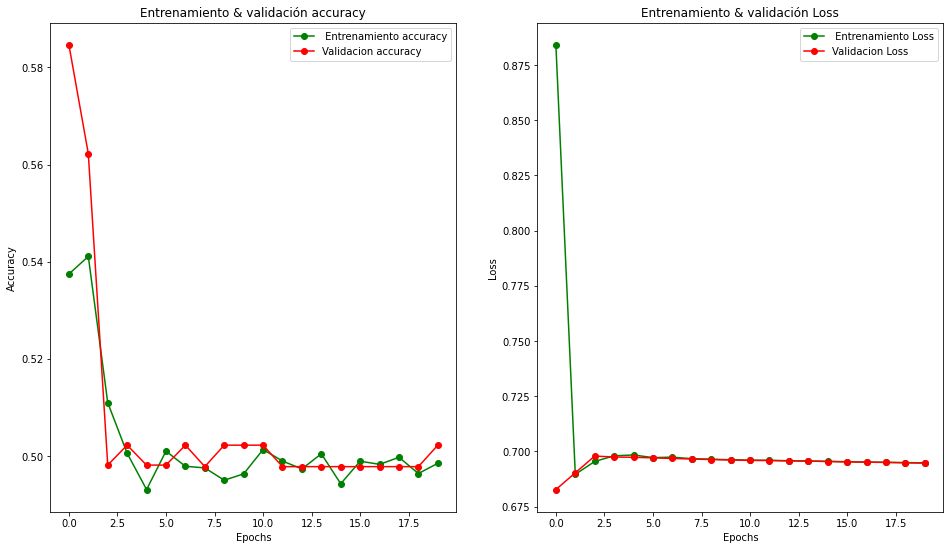

In [ ]:
visualizacion_resultados(history_optimizer)

## Creamos nuestro modelo con convoluciones

In [ ]:
model_convolutional = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape= (124, 124, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_convolutional.summary()

model_convolutional.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_convolutional = model_convolutional.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 122, 122, 75)      750       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 75)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 279075)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               71443456  
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

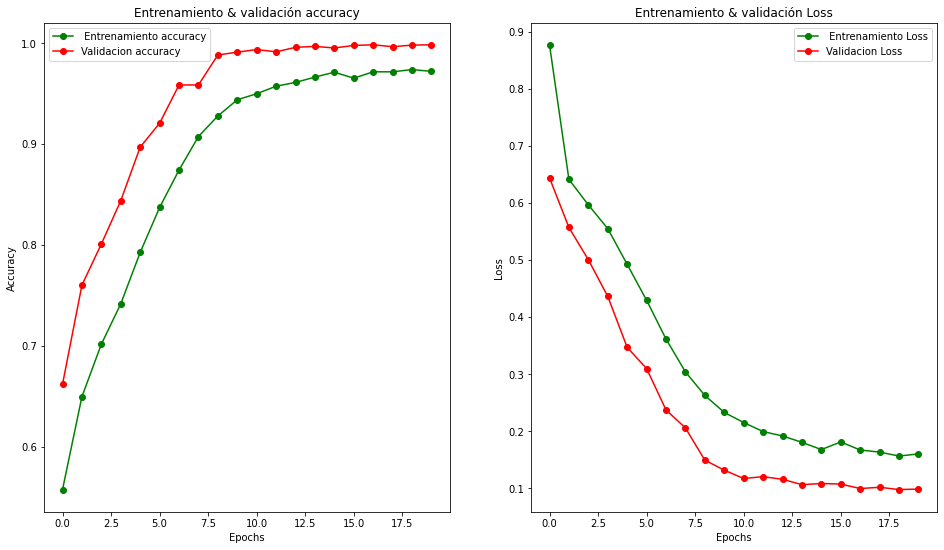

In [ ]:
visualizacion_resultados(history_convolutional)

## Calbacks personalizados
Link para visualizar más callbacks [aqui](https://colab.research.google.com/drive/1OYndV_bH8tDv5Qi8yxuoq4VzVUpsi82A?authuser=1).

In [ ]:
model_callback = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape= (124, 124, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_callback.summary()

model_callback.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 122, 122, 75)      750       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 75)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 279075)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               71443456  
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [ ]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get("accuracy") > 0.95:
      print("Lo logramos, nuestro modelo llego a 95%, detenemos el entrenamiento")
      self.model.stop_training = True


In [ ]:
callback = TrainingCallback()

history_callback = model_callback.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback],
    validation_data = validation_generator
)

Epoch 1/20
216/216 [==============================] - 47s 212ms/step - loss: 0.8951 - accuracy: 0.5784 - val_loss: 0.6375 - val_accuracy: 0.6346
Epoch 2/20
216/216 [==============================] - 45s 210ms/step - loss: 0.6288 - accuracy: 0.6657 - val_loss: 0.5341 - val_accuracy: 0.7697
Epoch 3/20
216/216 [==============================] - 45s 209ms/step - loss: 0.5865 - accuracy: 0.7095 - val_loss: 0.5179 - val_accuracy: 0.7609
Epoch 4/20
216/216 [==============================] - 45s 209ms/step - loss: 0.5343 - accuracy: 0.7617 - val_loss: 0.4207 - val_accuracy: 0.8607
Epoch 5/20
216/216 [==============================] - 45s 209ms/step - loss: 0.4772 - accuracy: 0.8024 - val_loss: 0.4283 - val_accuracy: 0.8323
Epoch 6/20
216/216 [==============================] - 45s 209ms/step - loss: 0.4089 - accuracy: 0.8505 - val_loss: 0.2945 - val_accuracy: 0.9368
Epoch 7/20
216/216 [==============================] - 45s 209ms/step - loss: 0.3323 - accuracy: 0.8927 - val_loss: 0.2187 - val_ac

In [ ]:
def get_model():
  model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape= (124, 124, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
  ])
  return model

model_early = get_model()
model_early.summary()

model_early.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 122, 122, 75)      750       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 61, 75)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 279075)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               71443456  
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

## Early stopping

In [ ]:
callback_early = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience=3, mode = "auto")

In [ ]:
history_early = model_early.fit(
    train_generator, 
    epochs= 20, 
    callbacks = [callback_early],
    validation_data = validation_generator
)

Epoch 1/20
216/216 [==============================] - 46s 210ms/step - loss: 1.0235 - accuracy: 0.5741 - val_loss: 0.6245 - val_accuracy: 0.6731
Epoch 2/20
216/216 [==============================] - 45s 209ms/step - loss: 0.6225 - accuracy: 0.6681 - val_loss: 0.5478 - val_accuracy: 0.7808
Epoch 3/20
216/216 [==============================] - 45s 209ms/step - loss: 0.5741 - accuracy: 0.7202 - val_loss: 0.4965 - val_accuracy: 0.7862
Epoch 4/20
216/216 [==============================] - 45s 210ms/step - loss: 0.5281 - accuracy: 0.7637 - val_loss: 0.4513 - val_accuracy: 0.8623
Epoch 5/20
216/216 [==============================] - 45s 209ms/step - loss: 0.4638 - accuracy: 0.8132 - val_loss: 0.3299 - val_accuracy: 0.9160
Epoch 6/20
216/216 [==============================] - 45s 208ms/step - loss: 0.3700 - accuracy: 0.8701 - val_loss: 0.2495 - val_accuracy: 0.9523
Epoch 7/20
216/216 [==============================] - 45s 209ms/step - loss: 0.3053 - accuracy: 0.9094 - val_loss: 0.1847 - val_ac

## Creamos nuestra modelo funcional con Auto Tunner Keras

In [ ]:
!pip install -q -U keras-tuner
import kerastuner as kt
from tensorflow import keras

     |████████████████████████████████| 97 kB 3.1 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [ ]:
def constructor_modelos(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(75, (3,3), activation= "relu", input_shape = (124, 124, 1)))
  model.add(tf.keras.layers.MaxPool2D((2,2)))
  model.add(tf.keras.layers.Flatten())

  hp_units = hp.Int("units", min_value = 32, max_value = 512, step = 32)
  model.add(tf.keras.layers.Dense(units=hp_units,activation = "relu", kernel_regularizer= regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(128,activation = "relu", kernel_regularizer= regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(len(classes), activation = "softmax"))

  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate),loss = "categorical_crossentropy", metrics = ["accuracy"])

  return model


In [ ]:
tuner = kt.Hyperband(
    constructor_modelos,
    objective = "val_accuracy",
    max_epochs = 20,
    factor = 3,
    directory = "models/",
    project_name = "platzi-tunner"
)

In [ ]:
tuner.search(train_generator, epochs =20, validation_data = validation_generator)

best_hps = tuner.get_best_hyperparameters(num_trials =1)[0]

Trial 30 Complete [00h 18m 22s]
val_accuracy: 0.985786497592926

Best val_accuracy So Far: 0.9971572756767273
Total elapsed time: 03h 27m 04s
INFO:tensorflow:Oracle triggered exit


In [ ]:
print(best_hps.get("units"))

512


In [ ]:
print(best_hps.get("learning_rate"))

0.001


In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

history_hypermodel = hypermodel.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback_early],
    validation_data = validation_generator
)

Epoch 1/20
216/216 [==============================] - 61s 277ms/step - loss: 0.9139 - accuracy: 0.5712 - val_loss: 0.6475 - val_accuracy: 0.6586
Epoch 2/20
216/216 [==============================] - 60s 276ms/step - loss: 0.6422 - accuracy: 0.6635 - val_loss: 0.5703 - val_accuracy: 0.7571
Epoch 3/20
216/216 [==============================] - 60s 276ms/step - loss: 0.5970 - accuracy: 0.7162 - val_loss: 0.5032 - val_accuracy: 0.8061
Epoch 4/20
216/216 [==============================] - 60s 276ms/step - loss: 0.5494 - accuracy: 0.7623 - val_loss: 0.4372 - val_accuracy: 0.8591
Epoch 5/20
216/216 [==============================] - 60s 276ms/step - loss: 0.4765 - accuracy: 0.8248 - val_loss: 0.3524 - val_accuracy: 0.9185
Epoch 6/20
216/216 [==============================] - 60s 277ms/step - loss: 0.3971 - accuracy: 0.8734 - val_loss: 0.2579 - val_accuracy: 0.9653
Epoch 7/20
216/216 [==============================] - 60s 277ms/step - loss: 0.3267 - accuracy: 0.9148 - val_loss: 0.2121 - val_ac

## Guardar únicamente arquitectura del modelo

In [ ]:
config_dict = hypermodel.get_config()

In [ ]:
print(config_dict)

{'name': 'sequential', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 124, 124, 1), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'conv2d_input'}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d', 'trainable': True, 'batch_input_shape': (None, 124, 124, 1), 'dtype': 'float32', 'filters': 75, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d', 'trainable': True, 'dtype': 'float32', 'pool_size': (2, 2), 'padding': 'valid', 'strides': (2, 2), 'data_format': 'channels_last'}}, {'cl

## Crear un nuevo modelo desde la arquitectura

In [ ]:
model_same_config = tf.keras.Sequential.from_config(config_dict)

In [ ]:
model_same_config.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 122, 122, 75)      750       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 75)        0         
_________________________________________________________________
flatten (Flatten)            (None, 279075)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               142886912 
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

### Lecturas adicionales para almacenamiento de arquitectura
* https://www.tensorflow.org/guide/keras/save_and_serialize#architecture-only_saving
* https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model

## Guardar y cargar únicamente los pesos
#### Entrenar el modelo con los checkpoints

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model_weight = get_model()
model_weight.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 122, 122, 75)      750       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 75)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 279075)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               71443456  
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [ ]:
model_weight.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
# Creamos unos checkpoint de nuestros modelos con TensorFlow, verbose: mostrar mas información
checkpoint_path = "model_checpoints/checkpoint"
checkpoint_weighs= ModelCheckpoint(
    filepath = checkpoint_path,
    frecuency = "epoch",
    save_weights_only = True,
    verbose = 1

)

In [ ]:
# Entrenamos el modelo, y almacenamos en cada steps los pesos del moedelo.
history_weight = model_weight.fit(
    train_generator,
    epochs = 20,
    callbacks = [checkpoint_weighs],
    validation_data = validation_generator
)


Epoch 1/20
216/216 [==============================] - 47s 213ms/step - loss: 1.0166 - accuracy: 0.5603 - val_loss: 0.6560 - val_accuracy: 0.6184

Epoch 00001: saving model to model_checpoints/checkpoint
Epoch 2/20
216/216 [==============================] - 45s 208ms/step - loss: 0.6399 - accuracy: 0.6523 - val_loss: 0.5683 - val_accuracy: 0.7337

Epoch 00002: saving model to model_checpoints/checkpoint
Epoch 3/20
216/216 [==============================] - 46s 212ms/step - loss: 0.5919 - accuracy: 0.7052 - val_loss: 0.5266 - val_accuracy: 0.7855

Epoch 00003: saving model to model_checpoints/checkpoint
Epoch 4/20
216/216 [==============================] - 45s 207ms/step - loss: 0.5397 - accuracy: 0.7540 - val_loss: 0.4545 - val_accuracy: 0.8124

Epoch 00004: saving model to model_checpoints/checkpoint
Epoch 5/20
216/216 [==============================] - 45s 206ms/step - loss: 0.4726 - accuracy: 0.8044 - val_loss: 0.3361 - val_accuracy: 0.8986

Epoch 00005: saving model to model_checpoi

#### Guardamos los pesos de forma manual

In [ ]:
model_weight.save_weights("model_manul/my_model")

#### Creamos la arquitectura y cargamos los pesos

In [ ]:
model_weights2 = get_model()
model_weights2.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
model_weights2.load_weights(checkpoint_path)


In [ ]:
model_weights2.evaluate(test_generator)

In [ ]:
model_weight.evaluate(test_generator)

## Criterios para lmacenar modelos
#### Almacenar infraestructura y peso

In [ ]:
checkpoint_path = "model_checpoints_complete"
checkpoint_weighs= ModelCheckpoint(
    filepath = checkpoint_path,
    frecuency = "epoch",
    save_weights_only = False,
    monitor = "val_accuracy",
    save_best_only = True,
    verbose = 1

)

In [ ]:
model_complete = get_model()
model_complete.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_complete = model_complete.fit(
    train_generator,
    epochs = 20,
    callbacks = [checkpoint_weighs],
    validation_data = validation_generator
)

#### Almacenar infraestructura y peso manual

In [ ]:
model_complete.save("saved_model_complete/mymodel")

#### Cargamos nuestro modelo completo

In [ ]:
model_complete3 = tf.keras.models.load_model("saved_model_complete/mymodel")

In [ ]:
model_complete3.evaluate(test_generator)

In [ ]:
model_complete.evaluate(test_generator)

#### Usar el formato .h5 para guardar modelos.
Hierarchical Data Format (HDF5 format)

In [ ]:
!pip install pyyaml h5py

In [ ]:
model_complete3.save("my_model.h5")

In [ ]:
model_complete4 = tf.keras.models.load_model("my_model.h5")

## Creamos nuestra modelo pre-entrenado con modelos de Keras
#### Preprocesamiento de nuestra base de datos.
Debemos revisar cual es el input de nuestro modelos (Tamaño del tensor de entrada)

In [ ]:
train_generator_resize = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "rgb",
    subset = "training"
)

validation_generator_resize = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "rgb",
    subset = "validation"
)

test_generator_resize = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "rgb"
)

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(
    include_top = False,
    input_tensor = tf.keras.layers.Input(shape = (150, 150, 3))
)

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

#### Congelamos el modelo 
Congelamos hasta la capa mixed 7 para agregar nuestra capas de salida

In [ ]:
last_layers= pre_trained_model.get_layer("mixed7")
last_output = last_layers.output

In [ ]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(128, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(len(classes), activation= "softmax")(x)

model_keras = tf.keras.Model(pre_trained_model.input, x)

model_keras.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model_keras.summary()

In [ ]:
history_keras = model_keras.fit(
    train_generator_resize,
    epochs = 5,
    validation_data = validation_generator_resize
)

In [ ]:
results = model_keras.evaluate(test_generator_resize)

## Creamos nuestra modelo pre-entrenado con modelos desde TensorFlow Hub

In [ ]:
import tensorflow_hub as hub

In [ ]:
module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"

model_hub = tf.keras.Sequential([
                                 tf.keras.layers.InputLayer(input_shape=(150, 150, 3)),
                                 hub.KerasLayer(module_url, trainable=False),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(128, activation ="relu"),
                                 tf.keras.layers.Dropout(rate=0.2),
                                 tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_hub.build((None, 150, 150, 3))
model_hub.summary()

In [ ]:
model_hub.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_hub = model_hub.fit(
    train_generator_resize,
    epochs= 5,
    validation_data = validation_generator_resize
)

In [ ]:
results = model_hub.evaluate(test_generator_resize)

## Conectar con TensorBoard

In [ ]:
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

In [ ]:
model_tensorboard = get_model()
model_tensorboard.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])



In [ ]:
callback_tensorboard = TensorBoard(log_dir = "logs/{}".format(time()))

In [ ]:
history_tensorboard = model_tensorboard.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback_tensorboard],
    validation_data = validation_generator
)

#### Ejecutamos nuestro tensorboard con los comandos magic.
Se puede visualizar desde Google Colab o desde el terminal

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs 


## Comportamos los resultados con el mundo entero
Mayor información ingresa sobre Tensorflow.dev [aquí](https://tensorboard.dev/)

In [ ]:
!tensorboard dev upload --logdir ./logs --name "Proyecto de lenguaje de señas " --description "Estos son los resultados del entrenamiento" --one_shot